#### *Load dependencies* 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras



#### *Load The  DataSet* 

In [8]:
data = pd.read_csv("Data/chicago_taxi_train.csv")


#### *Describe The Dataset* 

In [18]:
# print(data.info())
# print(data[data.select_dtypes(include=['int64' , 'float64']).columns.tolist()].corr())
print(len(data.index))
# print(data.isnull().sum())

# print(data.groupby('COMPANY')['COMPANY'].value_counts())
print(data['COMPANY'].nunique())


31694
31


### **Generate a Correlation matrix**

In [20]:
MatrixCorrrelation = data.corr(numeric_only=True)

print(MatrixCorrrelation)

                        TRIP_START_HOUR  TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  \
TRIP_START_HOUR                1.000000      0.008696   -0.038388   -0.095969   
TRIP_SECONDS                   0.008696      1.000000    0.800855    0.301209   
TRIP_MILES                    -0.038388      0.800855    1.000000    0.748004   
TRIP_SPEED                    -0.095969      0.301209    0.748004    1.000000   
PICKUP_CENSUS_TRACT            0.074479      0.493533    0.593248    0.559719   
DROPOFF_CENSUS_TRACT          -0.168438      0.141334    0.162535    0.152314   
PICKUP_COMMUNITY_AREA          0.011324      0.437223    0.591359    0.499278   
DROPOFF_COMMUNITY_AREA        -0.128613      0.195731    0.249433    0.222068   
FARE                          -0.037789      0.830292    0.975344    0.695734   
TIPS                           0.037504      0.433930    0.575374    0.421333   
TIP_RATE                       0.062828     -0.084294   -0.049594   -0.057886   
TOLLS                       

### **Visualize relationships in dataset**

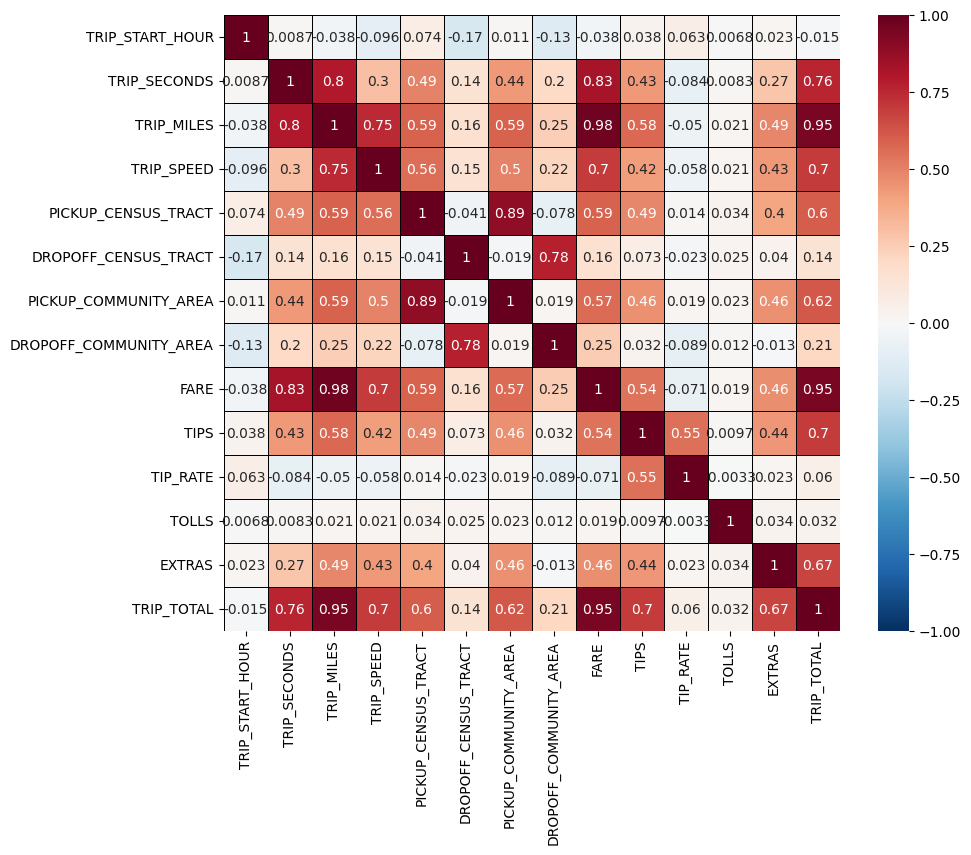

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(MatrixCorrrelation , annot=True, cmap='RdBu_r' , vmin=-1  , vmax=1 , square=True , linewidths=0.5,  linecolor='black')
plt.show()

<Figure size 1000x800 with 0 Axes>

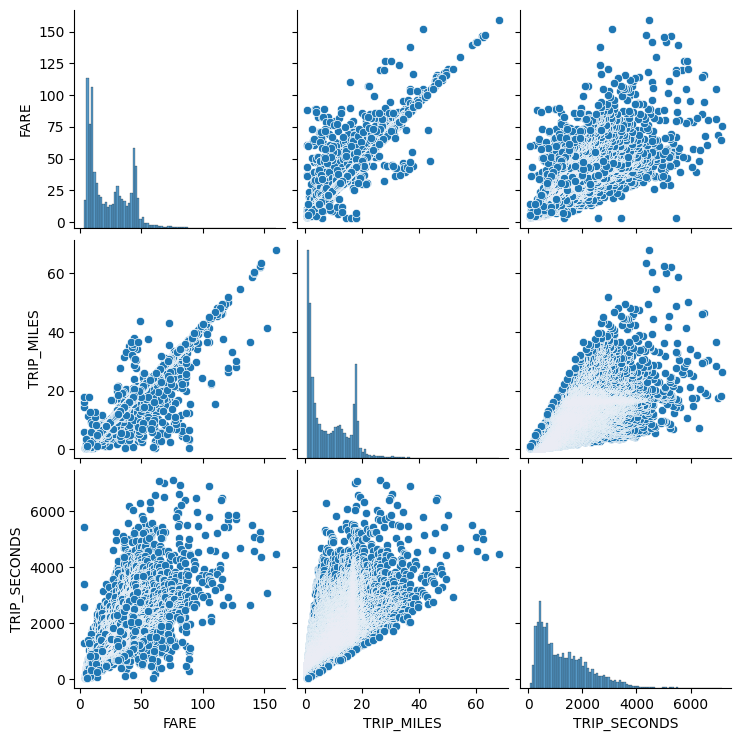

In [32]:
plt.figure(figsize=(10, 8))
sns.pairplot(data , x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"] , y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

In [ ]:
def make_plot(df  , feature_names, label_name , model_output , sample_size = 200)  : 
    random_sample = df.sample(n=sample_size).copy().reset_index()
    weight ,bias, epochs, rmse = model_output

    is_2d_plot = len(feature_names)==1
    model_type = "scatter" if is_2d_plot else "surface"

    


### **Training The Model**

In [45]:
def build_model(number_Feature , learning_Rate) : 
    inputs = keras.Input(shape=(number_Feature,))
    outputs = keras.layers.Dense(units=1)(inputs)
    model = keras.Model(inputs=inputs , outputs=outputs)
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_Rate) , loss="mean_squared_error" , metrics=[keras.metrics.RootMeanSquaredError()])
    return model


def Training_Model(model , df , features  , lables, epochs  ,batch_size) : 

    history = model.fit(x = features , y = lables ,batch_size = batch_size , epochs = epochs)
    Trained_weight = model.get_weights()[0]
    Trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)

    rmse = hist["root_mean_squared_error"]

    return Trained_weight, Trained_bias, epochs, rmse , hist



def run_experiment(df , feature_names , label_names , learning_rate , epochs , batch_size) : 
    print('INFO: starting training experiment with features = {} and labels = {}'.format(feature_names , label_names))

    number_feature = len(feature_names)
    features = df.loc[: , feature_names].values
    labels = df.loc[: , label_names].values

    model = build_model(number_feature , learning_rate)
    model_output = Training_Model(model , df , features , labels , epochs , batch_size)
    return model_output




### **Expirement 1**

In [87]:
learnin_rate = 0.001
epochs = 20
batch_size = 50
features = ['TRIP_MILES']
label = 'FARE'
model_1 = run_experiment(data , features , label , learnin_rate , epochs , batch_size)

INFO: starting training experiment with features = ['TRIP_MILES'] and labels = FARE
Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 217.3243 - root_mean_squared_error: 14.7157
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 68.0803 - root_mean_squared_error: 8.2116
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19.6363 - root_mean_squared_error: 4.4268
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.2886 - root_mean_squared_error: 4.1530
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.9004 - root_mean_squared_error: 4.1069
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.9010 - root_mean_squared_error: 4.1062
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3682 - root_mean_squared_error: 3.7852
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.7721 - root_mean_squared_error: 3.5694
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.5580 - root_mean_squared_error: 3.8

## **Visualisaiton Taining Of Model**

[[2.2804024]] [4.9831743]


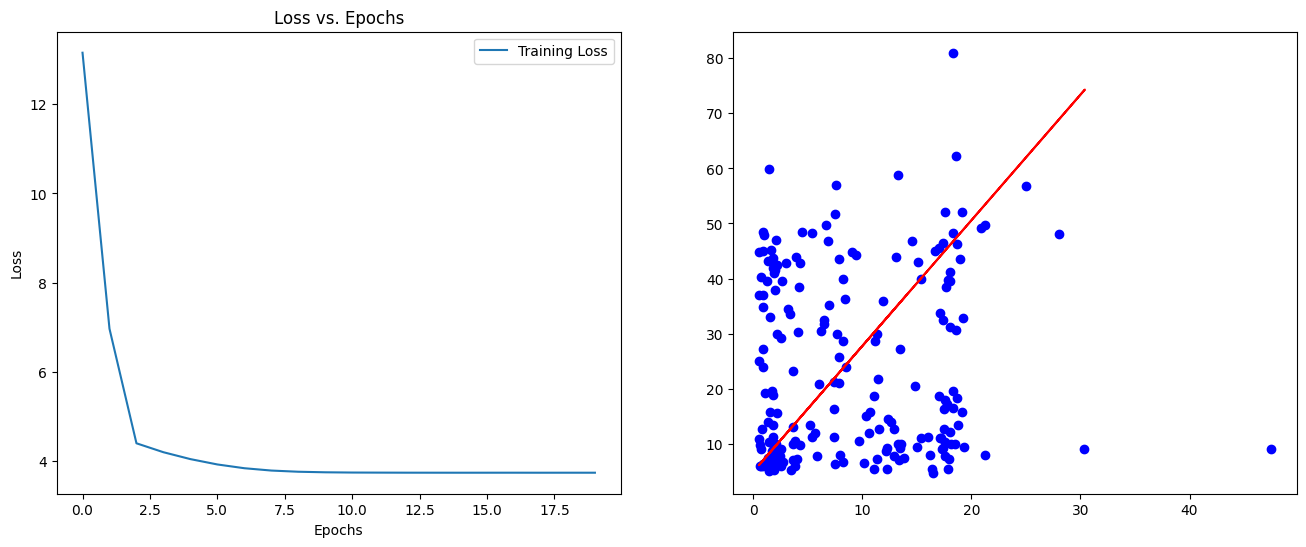

In [ ]:
weights , bias , epochs , rmse , hist = model_1

plt.figure(figsize=(16,6))
plt.subplot(1 ,2 ,1)
plt.plot(rmse, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

x = data['TRIP_MILES'].sample(200).values
y = weights[0][0]*x+bias[0]
plt.subplot(1 ,2 , 2)
plt.scatter(data['TRIP_MILES'].sample(200).values, data['FARE'].sample(200).values, color='blue', marker='o', label="Data Points")
plt.plot(x, y, color='red')  # Line
plt.show()


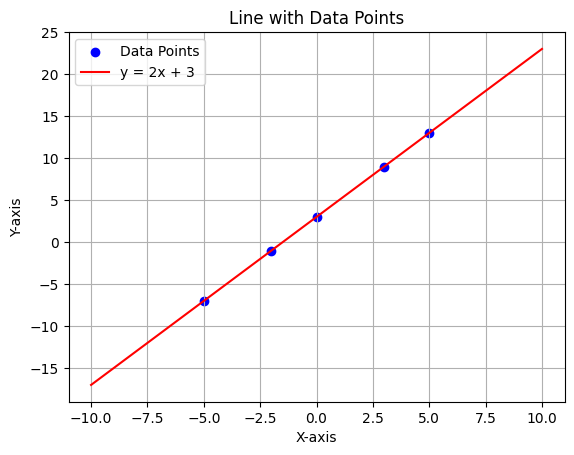